## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [6]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [7]:
np.random.rand(5) < 0.51 # Random number is less than the true fraction we will get True and False for Brown and Green respectively.

array([ True, False, False,  True,  True])

In [9]:
# This function lets me generate a random sample set of 1000 data points for votes.
def sample(brown, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [10]:
s = sample(0.51, n=1000)

In [11]:
s.vote.value_counts(normalize=True)
# Observation: In this sample Brown is under the level of winning the elections. However, his true fraction is 0.51.

Brown    0.517
Green    0.483
Name: vote, dtype: float64

In [12]:
# Here we are repeating the random sampling many times and collect the results in the DataFrame
# ie. In the below code we are executing 1000 simulated experiments for sampling.
dist = pd.DataFrame(sample(0.51).vote.value_counts(normalize=True) for _ in range(1000)) 
# Here we are sampling 1000 times and collecting only the fractions to asses true population fractions. To do this we plot a distribution curve.

In [13]:
dist.head()

,Brown,Green
vote,0.545,0.455
vote,0.510,0.490
vote,0.483,0.517
vote,0.512,0.488
vote,0.521,0.479


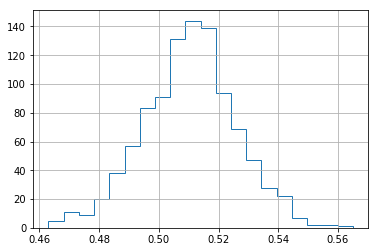

In [18]:
dist.Brown.hist(histtype='step', bins=20)# Observation: For a true brown fraction of 0.51 we may obtain any sample proportion from 0.48 to 0.55.

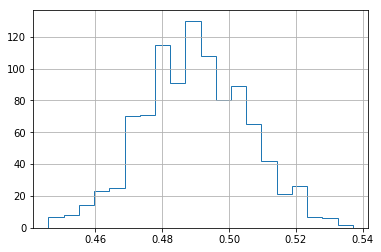

In [23]:
dist.Green.hist(histtype='step', bins=20)

In [24]:
dist.Green.describe()

count    1000.000000
mean        0.489807
std         0.015732
min         0.446000
25%         0.479000
50%         0.490000
75%         0.501000
max         0.537000
Name: Green, dtype: float64

In [25]:
dist.Green.median()

0.49

In [22]:
def samplingdist(brown, n=1000): # return a sampling distrubition by simulation n sameples.
    return pd.DataFrame([sample(brown, n).vote.value_counts(normalize=True) for _ in range(1000)])

#### quantiles function
1. Creates a sampling dist of proportions using set of n simulated samples. 
2. Computes Confidence interval boundries (2.5 Quanile and 97.5 Quantile which holds 95 percent of data spread.)

In [23]:
def quantiles(brown, n=1000):  
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

#### Quantile gives a confidence interval boundries by simulation 1000 times for the brown to win with propablility of 0.51.

In [24]:
quantiles(0.51) # when point estimate is 0.51 margin of error is 0.03. 

(0.48, 0.54)

In [32]:
quantiles(0.51, n=1000000)

(0.5090537, 0.5109674499999999)

In [26]:
largepoll = pd.read_csv('poll-larger.csv')

In [27]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [33]:
import timeit

In [34]:
if __name__ == "__main__": # timeit works only with main function call.
    timeit.timeit('quantiles(0.51,100)', number=10000)

NameError: name 'quantiles' is not defined